# Assignment 2 #
### Due: Friday, September 22 to be submitted via Canvas by 11:59 pm ###
### Total points: **90** ###

Your homework should be written in a python notebook. If you prefer, you can work in groups of two. For any question that requires a handwritten solution, you may upload scanned images of your solution in the notebook or attach them to the assignment . You may write your solution using markdown as well.

### Note that:
###1. Only one student per group needs to submit the assignment on Canvas;
###2. Make sure to include both students' names and UT EIDs in your submitted notebook;
###3. Please make sure your code runs, the graphs and figures are displayed in your notebook before submitting. (%matplotlib inline)
###4. Late submissions receive 0 points.



# Question 1: Bias and Variance (**10 pts**)

(a). (**4 pts**) Describe the difference between model bias and the bias of a point estimator.

The model bias is the systematic error in the model. Bias of the point estimator is the expected difference between the estimators expected value and the estimator's true value. It can be proved that the bias of the point estimator can be 0, whereas in the real world, the model bias is almost never 0. 

(b) (**6 pts**). How can you use a learning curve to determine whether a model is overfitting  (for a given sample size)? Discuss this with respect to the observed train and validation error curves. How does your answer change if the model you are trying to determine is underfitting?

You can see that a model is overfitting for a given sample size by looking at the difference in errors between the train and validation curves. If the training set is performing well but the validation set is not, then this indicates the model is overfitting. This is because models should generalize outsize of the data that it used to train on and big gaps in errors between training and validation sets indicate that the model is not generalizing. When models are underfitting, the training and validation set performance may be very close. However, this usually results in poor performance i.e. high errors. 



# Question 2: Bias-Variance Exploration (**20 points**)
Consider a function $g$ such that $g(x)=2sin(\pi
x)cos(3\pi x^2)$. We will try to fit this function using a simple binning based function with varying number of bins (steps).

a) (2 points) Generate a dataset $(D = X,Y)$ by generating 2000 data points in the following way -
*  $x_i = \frac{i}{2000}$ for each $i$ in $1, 2, 3 \ldots 2000$.
* Then, for each of the $x_i$'s obtain $y_i = 2sin(\pi x_i)cos(3\pi x_i^2)+ N(0,1)$ where $N(0,1)$ denotes the normal distribution with mean 0 and variance 1.

**Generate 10 datasets** by independently repeating the entire process 10 times. Plot any one of the generated datasets.


In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
def generate_data(num_points):
  x = np.arange(1, num_points + 1) / num_points
  ### START CODE ###
  # Compute y according to the labeling function g
  pi = math.pi  
  random_sample = np.random.normal(0, 1, size=(1, num_points))
  y = 2 * np.sin(pi * x) * np.cos(3* pi * x**2) + random_sample
  ### END CODE ###
  return x,y

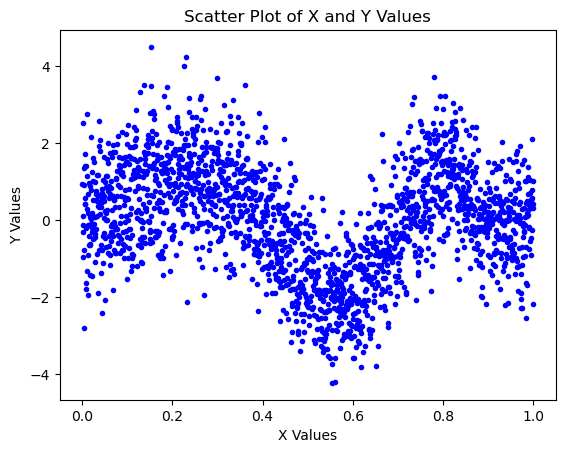

In [2]:
datasets = {}
for j in range(10):
  datasets[j] = {}
  datasets[j]['X'], datasets[j]['Y'] = generate_data(2000)

### START CODE ###
# Plot y v.s. x of any one of the dataset
x3 = datasets[3]['X']
y3 = datasets[3]['Y']

plt.scatter(x3, y3, color="blue", marker=".")
plt.xlabel("X Values")
plt.ylabel("Y Values")
plt.title("Scatter Plot of X and Y Values")
plt.show()
### END CODE ###

b) (5 points) Consider an estimator of function $g$, $f(x)$ that divides the x's into $K$ bins such that there are $m = n/K$ data points in each bin and the predicted y for all points in that bin is the mean of all the $y$'s in the bin.
$$
f(x) = \sum_{j=1}^{K} \bar{y}_j \mathbb{1}(x \in \text{bin } j)
$$
where
$$
\bar{y}_j = \frac{1}{m}\sum_{i=j*m}^{(j+1)*m-1} y_i.
$$
Implement this estimator. Obtain $Y_{hat} = f(x)$ for one of the datasets created above by using $K=25$ and plot the predicted $Y_{hat}$ along with $X$ and $Y$.

In [3]:
### START CODE ###
# Implement Estimator
import pandas as pd

def implement_estimator(x,y,num_bins):
    K = num_bins
    m = x.size / K

    df = pd.DataFrame({'x': x, 'y': y[0]})
    
    df['fold_index'] = (df.index // m) + 1
    df['pred'] = df.groupby('fold_index')['y'].transform('mean')

    return df

### END CODE ###

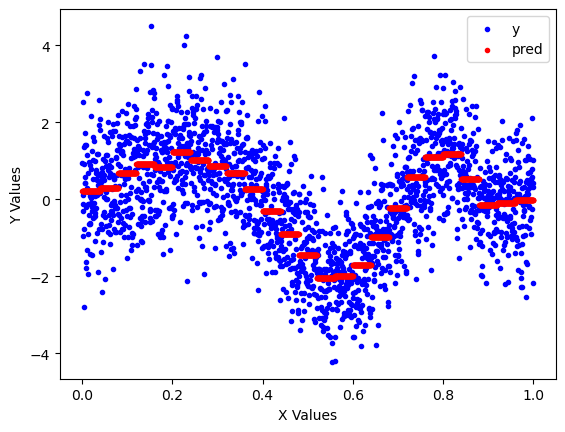

In [4]:
### START CODE ###
# Plot predicted y_{hat} along with X and Y
df = implement_estimator(x3, y3, 25)

# Create a scatter plot for y1
plt.scatter(df['x'], df['y'], label='y', color='blue', marker='.')

# Create a scatter plot for y2
plt.scatter(df['x'], df['pred'], label='pred', color='red', marker='.')

# Add labels and legend
plt.xlabel('X Values')
plt.ylabel('Y Values')
plt.legend()

# Show the plot
plt.show()
### END CODE ###

c) (3 points) What do you think will happen to the MSE, the bias and the variance as the number of bins $K$ is increased?

The MSE should continue to increase, but the rate of increase will continue to decrease as more bins are added. The bias will decrease and variance will increase.


d) (5 points) For each dataset, vary the number of bins $K \in \{2,5,10,25,50,100,250,500,1000\}$ and obtain the predictions. Also, for any one of the datasets (your choice), compute and plot the MSE obtained with varying $K$.



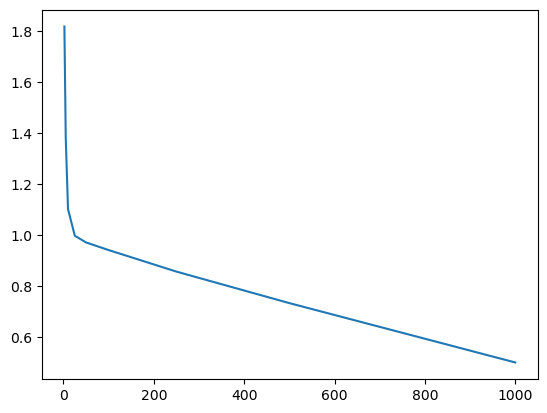

In [5]:
mse_scores = []
K = [2,5,10,25,50,100,250,500,1000]
for n in K:
  ### START CODE ###
  # For the chosen dataset, compute y_hat
  df = implement_estimator(x3, y3, n)
  ### END CODE ###

  ### START CODE ###
  # Compute MSE
  #mse = np.mean((df['y'] - df['pred'])**2)
  mse = mean_squared_error(df['y'], df['pred'])
  ### END CODE ###
  
  mse_scores.append(mse)

plt.plot(K,mse_scores)
plt.show()

e) (5 points) Recall the definitions of the bias and variance, and now given the predictions obtained from 10 different datasets, compute the (sample) bias and variance of the model for each of the $K \in \{2,5,10,25,50,100,250,500,1000\}$ and plot **bias-squared vs $K$** and **variance vs. $K$**  on the same plot.
We are using the term "sample" to remember that bias/variance are "expected quantities" that we are approximating by considering only 10 models, one per dataset.


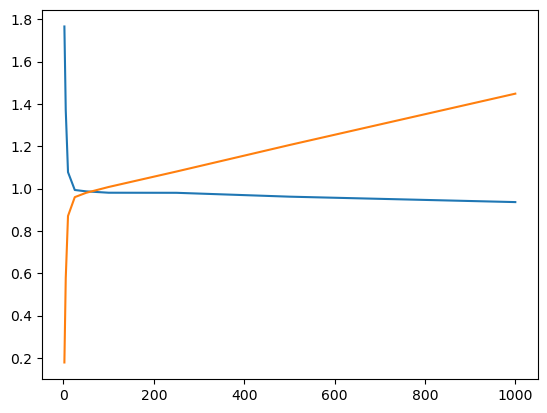

In [6]:
bias_vals = []
var_vals = []
K = [2,5,10,25,50,100,250,500,1000]
pred_y = np.zeros((len(datasets[0]['X']),10)) # axis 0: number of data points, axis 1: number of datasets (10)

for n in K: 
  for j in datasets.keys():
    x = datasets[j]['X']
    y = datasets[j]['Y']
    ### START CODE ###
    # Estimate y_{hat}
    df = implement_estimator(x, y, n)
    y_hat = df['pred']
    ### END CODE ###
    pred_y[:,j] = y_hat

  ### START CODE ###
  # Compute the mean of the estimates over 10 datasets for each input x_{i}
  avg_yhat = np.mean(pred_y, axis=1) # 1D array of shape (2000,)
  # Compute the MSE between avg_yhat and y as bias
  #bias = np.mean((avg_yhat - datasets[j]['Y'])**2)
  bias = mean_squared_error(datasets[j]['Y'][0], avg_yhat)
  # Compute the variance of the estimates over 10 datasets for each input x_{i}, then average over all inputs
  var_yhat = np.mean(np.var(pred_y[:,j]))
  ### END CODE ###
  bias_vals.append(bias)
  var_vals.append(var_yhat)
plt.plot(K, bias_vals)
plt.plot(K, var_vals)
plt.show()

# Question 3: Stochastic Gradient Descent Improvements (**10 pts**)

## Part 1. (**5 pts**) ##
Read this [blog](https://medium.com/optimization-algorithms-for-deep-neural-networks/gradient-descent-with-momentum-dce805cd8de8) on medium and describe in your own words how momentum leads to a faster convergence of the loss function.

When  normal gradient descent continue to oscillate toward the minima, momentum dampens the oscillations which slows down the descent when it is a suboptimal direction. For example, if the minima is straight to the right, gradient descent may oscillate up and down in the right direction. Using momentum would reduce the effect of going up and down as the momentums in the up and down direction reduce the amount of oscillations going up and down (which are the wrong directions). In other words, it would reduce the amount the oscillations go in suboptimal directions as it approaches minima. On the other hand, if gradient descent is going right alrerady, momentum would push it faster right and keep it going toward the minima faster. 

## Part 2. (**5 pts**) ##
Read this [blog](https://sweta-nit.medium.com/batch-mini-batch-and-stochastic-gradient-descent-e9bc4cacd461) on medium and explain in your own words the advantages of Mini-batch Stochastic Gradient Descent.

The main advantages of mini-batch stochastic gradient descent lies in the memory. It does not require all of the training data to be loaded into memory such as in batch gradient descent. Furthermore, it is more computationally efficient that SGD. In short, it is probably better to use batch gradient descent if the memory is available to feasibly do so. Although not as computationally efficient, mini-batch does not require all data to be loaded into memory and can most likely achieve a similar result as batch gradient descent. 

# Question 4: Stochastic Gradient Descent (30 pts)

## Part 1. (**10 pts**) Stochastic gradient descent derivation ##

Use stochastic gradient descent to derive the coefficent updates (assuming squared loss is being used as the cost function) for the 4 coefficients $w_0, w_1, w_2, w_3$ in this model：

$$ y = w_0 + w_1e^{-x_1} + w_2 x_1 + w_3x_1x_2 $$




$$ L = \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i)^2 $$

$$ L = 2(y - \hat{y})^2 $$

$$ L = \left( y - (w_0 + w_1 e^{-x_1} + w_2 x_1 + w_3 x_1 x_2) \right)^2 $$

$$ \frac{\partial L}{\partial w_0} = -2(y - \hat{y}) $$

$$ \frac{\partial L}{\partial w_1} = -2(y - \hat{y})e^{-x_1} $$

$$ \frac{\partial L}{\partial w_2} = -2(y - \hat{y})x_1 $$

$$ \frac{\partial L}{\partial w_3} = -2(y - \hat{y})x_1x_2 $$



$$ w_0 \leftarrow w_0 - \eta \frac{\partial w_0}{\partial L} = w_0 + \eta (y - \hat{y}) $$

$$ w_1 \leftarrow w_1 - \eta \frac{\partial w_1}{\partial L} = w_1 + \eta (y - \hat{y})e^{-x_1} $$

$$ w_2 \leftarrow w_2 - \eta \frac{\partial w_2}{\partial L} = w_2 + \eta (y - \hat{y})x_1 $$

$$ w_3 \leftarrow w_3 - \eta \frac{\partial w_3}{\partial L} = w_3 + \eta (y - \hat{y})x_1x_2 $$




## Part 2. (**20 pts**) Stochastic gradient descent coding ##

Code an SGD solution in Python for this non-linear model$$ y = w_0 + w_1e^{-x_1} + w_2x_1 + w_3x_1x_2 $$  The template of the solution class is given. The `init` method of the class takes as input the learning rate, regularization constant and number of epochs. The `fit` method must take as input `X`, `y`. The `predict` method takes an X value (optionally, an array of values).

a) (**15 pts**) Use the expression derived in Part 1 to predict the data given in 'SGD_samples.csv', for 15 epochs, using learning rates: [0, .0001, .001, .01, 0.1, 1, 10, 100] and regularization (ridge regression) constants: [0,10,100]. For the best 2 combinations of learning_rate and regularization for SGD, plot MSE and the $w$ parameters as a function of epoch (for 15 epochs) .

b) (**5 pts**) Report the MSE of the two best combinations of learning rate and regularization constant.

In [7]:
# Only use this code block if you are using Google Colab.
# If you are using Jupyter Notebook, please ignore this code block. You can directly upload the file to your Jupyter Notebook file systems.
#from google.colab import files

## It will prompt you to select a local file. Click on “Choose Files” then select and upload the file.
## Wait for the file to be 100% uploaded. You should see the name of the file once Colab has uploaded it.
#uploaded = files.upload()

In [8]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

class Regression:

    def __init__(self, learning_rate, regularization, n_epoch):
        self.learning_rate = learning_rate
        self.n_epoch = n_epoch
        self.regularization = regularization
        # initialize whichever variables you would need here
        self.coef = np.zeros(4)

    def sgd(self, gradient):
        # Update the self.coef using SGD
        ### START CODE ###
        self.coef = self.coef - self.learning_rate * gradient
        ### END CODE ###

    def fit(self, X, y, update_rule='sgd', plot=False):
        mse = []
        coefs = []
        X = self.get_features(X)
        for epoch in range(self.n_epoch):
            for i in range(X.shape[0]):               
                # Compute error
                ### START CODE ###
                error = y[i] - self.linearPredict(X[i])
                ### END CODE ###

                # Compute gradients
                ### START CODE ###
                gradient = -2 * error * X[i] + 2 * self.regularization * self.coef

                ### END CODE ###

                # Update weights
                ### START CODE ###
                self.sgd(gradient)
                ### END CODE ###

            coefs.append(self.coef)
            residuals = y - self.linearPredict(X)
            mse.append(np.mean(residuals**2))

        self.lowest_mse = mse[-1]
        if plot == True:
            plt.figure()
            plt.plot(range(self.n_epoch),mse)
            plt.xlabel('epoch')
            plt.ylabel('MSE')
            plt.figure()
            coefs = np.array(coefs)
            plt.plot(range(self.n_epoch),coefs[:,0],label='w0')
            plt.plot(range(self.n_epoch),coefs[:,1],label='w1')
            plt.plot(range(self.n_epoch),coefs[:,2],label='w2')
            plt.plot(range(self.n_epoch),coefs[:,3],label='w3')
            plt.legend()
            plt.xlabel('epoch')
            plt.ylabel('parameter value')

    def get_features(self, X):
        '''
        this output of this function can be used to compute the gradient in `fit`
        '''
        x = np.zeros((X.shape[0], 4))
        x[:,0] = 1
        x[:,1] = np.exp(-X[:,0])
        x[:,2] = X[:,0]
        x[:,3] = X[:,0]*X[:,1]

        return x

    def linearPredict(self, X):
        # Compute the dot product of self.coef and X
        ### START CODE ###
        return np.dot(X, self.coef)
        ### END CODE ###

In [9]:
data = pd.read_csv('SGD_samples.csv')
X = np.array([data['x1'].values, data['x2'].values]).T
y = data['y'].values
n_epochs = 15
learning_rate = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
regularization = [0, 10, 100]

In [10]:
# Iterate through all combinations of learning rates and regularization strength
# Use your Regression class to fit the data and record MSEs
### START CODE ###
mse = {}
for lr in learning_rate:
  for reg in regularization:
    reg_model = Regression(lr, reg, n_epochs)
    reg_model.fit(X, y)
    mse[(lr, reg)] = reg_model.lowest_mse

mse = {k: v for k, v in mse.items() if not (isinstance(v, float) and math.isnan(v))}
mse = sorted(mse.items(), key=lambda x: x[1])
lowest_key_1 = mse[0][0]
lowest_key_2 = mse[1][0]
### END CODE ###

C:\Users\alber\AppData\Local\Temp\ipykernel_32448\3308313528.py:47: RuntimeWarning: overflow encountered in square
  mse.append(np.mean(residuals**2))
C:\Users\alber\AppData\Local\Temp\ipykernel_32448\3308313528.py:36: RuntimeWarning: overflow encountered in add
  gradient = -2 * error * X[i] + 2 * self.regularization * self.coef
C:\Users\alber\AppData\Local\Temp\ipykernel_32448\3308313528.py:20: RuntimeWarning: invalid value encountered in subtract
  self.coef = self.coef - self.learning_rate * gradient
C:\Users\alber\AppData\Local\Temp\ipykernel_32448\3308313528.py:36: RuntimeWarning: overflow encountered in multiply
  gradient = -2 * error * X[i] + 2 * self.regularization * self.coef
C:\Users\alber\AppData\Local\Temp\ipykernel_32448\3308313528.py:36: RuntimeWarning: invalid value encountered in multiply
  gradient = -2 * error * X[i] + 2 * self.regularization * self.coef
C:\Users\alber\AppData\Local\Temp\ipykernel_32448\3308313528.py:36: RuntimeWarning: overflow encountered in scala

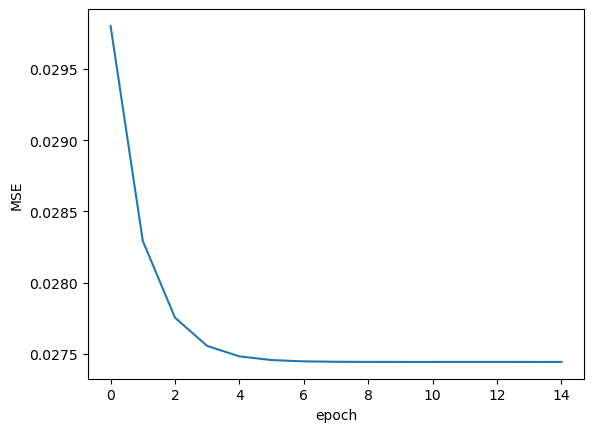

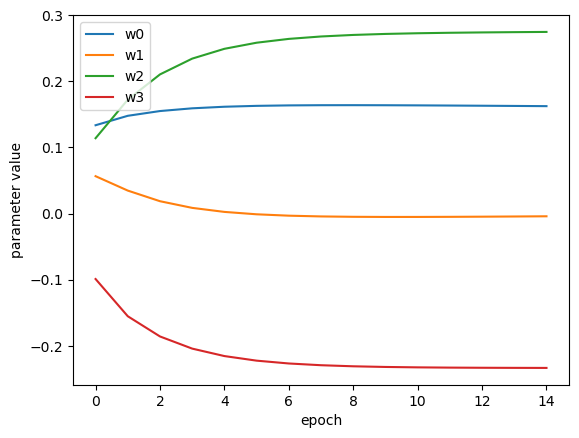

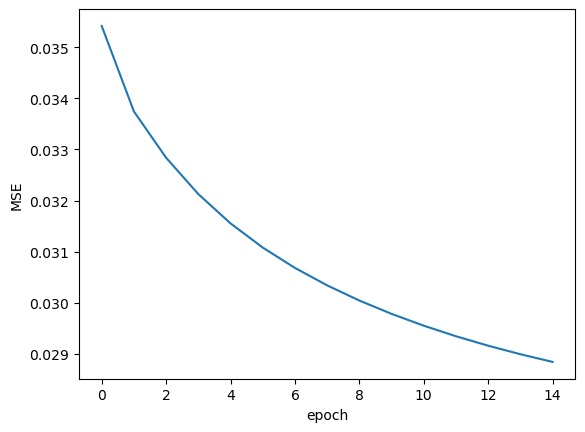

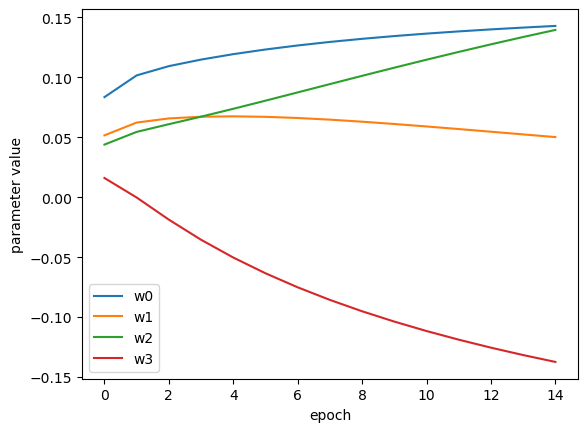

In [11]:
# For the best two combinations, use the plot option in Regression.fit() to plot MSE and parameters as a function of epoch (15 epochs)
### START CODE ###
reg_model = Regression(lowest_key_1[0], lowest_key_1[1], n_epochs)
reg_model.fit(X, y, plot=True)

reg_model2 = Regression(lowest_key_2[0], lowest_key_2[1], n_epochs)
reg_model2.fit(X, y, plot=True)
### END CODE ###

# Question 5: Visualizing Gradient Descent (**20 pts**) #

## Part 1. **(10 pts)** Coding ##

In this exercise, you are going to visualize four batch update steps of gradient descent for a  linear regression model with two parameters (i.e. weights, indicated by $\theta$).

The true target function is $t = \theta_{0} + \theta_{1}x$ with $\theta_{0}=2$ and $\theta_{1}=0.5$.

Try the following two initializations:
* $\theta_{0}=0$ and $\theta_{1}=0$
* $\theta_{0}=0$ and $\theta_{1}=-4$

and try the following three learning rates:
* 0.5
* 1
* 2.1

Therefore, there will be **six** combinations or settings to consider in total. For each setting, you will plot (a) the data and the changing linear regression fit and (b) the model parameters moving in the weight space after every update.

In [12]:
# Generate data
np.random.seed(42)
m = 20
theta0_true = 2
theta1_true = 0.5
x = np.linspace(-1,1,m)
y = theta0_true + theta1_true * x + np.random.normal(0, 0.2, size=x.shape)

In [13]:
def loss_func(theta0, theta1):
    theta0 = np.atleast_3d(np.asarray(theta0))
    theta1 = np.atleast_3d(np.asarray(theta1))
    return np.average((y - model(x, theta0, theta1))**2, axis=2)/2

def model(x, theta0, theta1):
    return theta0 + theta1 * x

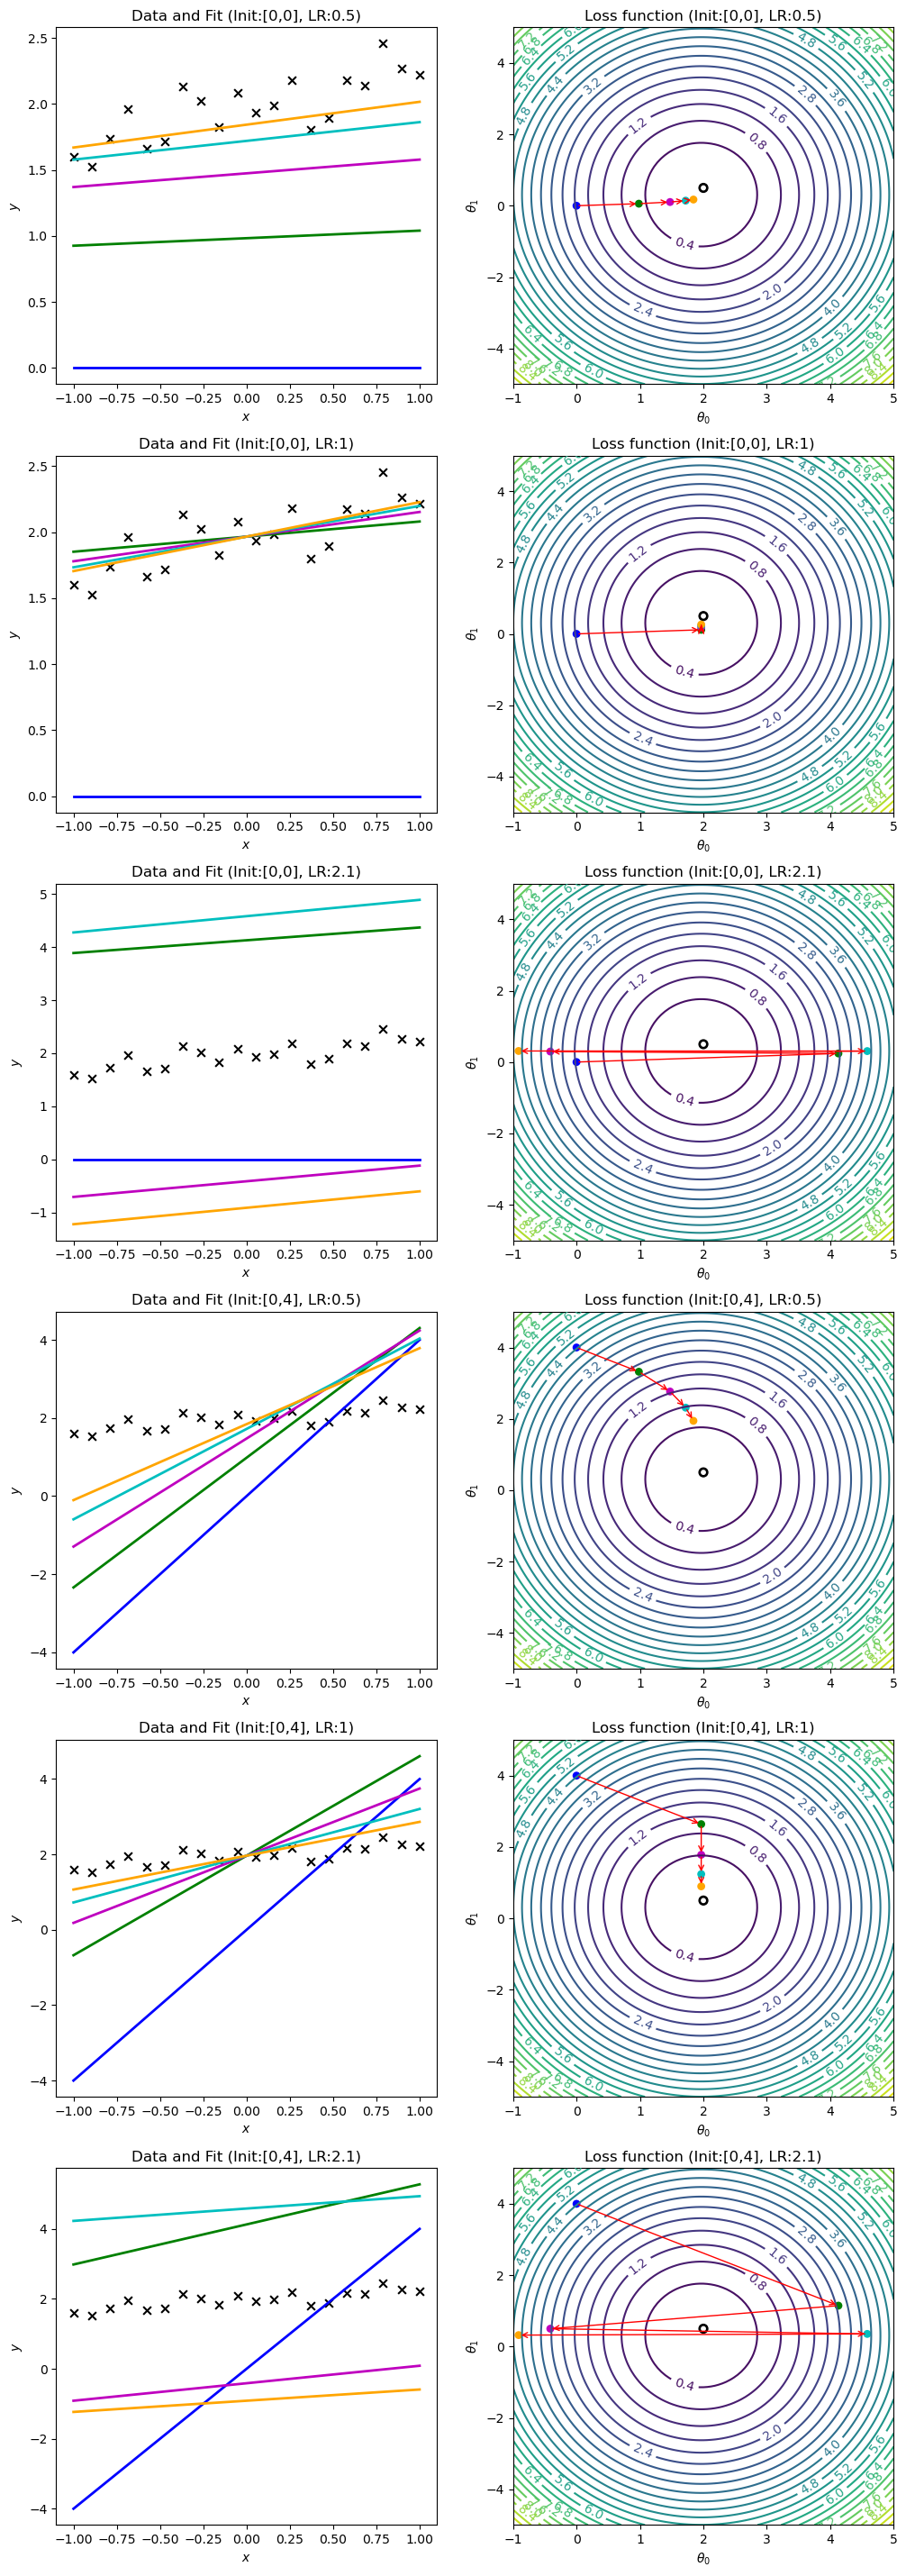

In [14]:
# Experiment with different initialization and learning rate combinations
### START CODE ###
init_list = [[0,0], [0,4]] 
lr_list = [0.5,1,2.1]
### END CODE ###

# Left column shows the data and the changing linear regression models
# Right column shows the model parameters moving over the loss landscape
fig, ax = plt.subplots(nrows=len(init_list) * len(lr_list), ncols=2, figsize=(12, 36))

for i, init in enumerate(init_list):
    for j, lr in enumerate(lr_list):
        row_idx = i * len(lr_list) + j
        ax[row_idx][0].scatter(x, y, marker='x', s=40, color='k')
        theta0_grid = np.linspace(-1,5,101)
        theta1_grid = np.linspace(-5,5,101)
        L_grid = loss_func(theta0_grid[np.newaxis,:,np.newaxis],
                           theta1_grid[:,np.newaxis,np.newaxis])

        # A labeled contour plot for the right column
        X, Y = np.meshgrid(theta0_grid, theta1_grid)
        contours = ax[row_idx][1].contour(X, Y, L_grid, 30)
        ax[row_idx][1].clabel(contours)
        # The target parameter values indicated on the loss function contour plot
        ax[row_idx][1].scatter([theta0_true]*2,[theta1_true]*2,s=[50,10], color=['k','w'])

        # Take N = 4 steps with learning rate alpha down the steepest gradient, starting at init
        N = 4
        theta = [init] # placeholder list for storing historical parameters
        L = [loss_func(*theta[0])[0]] # placeholder list for storing historical loss values
        for _ in range(N):
            last_theta = theta[-1]
            this_theta = np.empty((2,))
            # Update theta
            ### START CODE ### (2 lines of code)
            this_theta[0] = last_theta[0] - lr * np.sum((model(x, *last_theta) - y) * 1) / m
            this_theta[1] = last_theta[1] - lr * np.sum((model(x, *last_theta) - y) * x) / m
            ### END CODE ###
            theta.append(this_theta)
            L.append(loss_func(*this_theta))

        # Annotate the loss function plot with coloured points indicating the
        # parameters chosen and red arrows indicating the steps down the gradient.
        # Also plot the fit function on the LHS data plot in a matching colour.
        colors = ['b', 'g', 'm', 'c', 'orange']
        ax[row_idx][0].plot(x, model(x, *theta[0]), color=colors[0], lw=2,
                   label=r'$\theta_0 = {:.3f}, \theta_1 = {:.3f}$'.format(*theta[0]))
        for k in range(1,N+1):
            ax[row_idx][1].annotate('', xy=theta[k], xytext=theta[k-1],
                           arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1},
                           va='center', ha='center')
            ax[row_idx][0].plot(x, model(x, *theta[k]), color=colors[k], lw=2,
                   label=r'$\theta_0 = {:.3f}, \theta_1 = {:.3f}$'.format(*theta[k]))
        ax[row_idx][1].scatter(*zip(*theta), c=colors, s=40, lw=0)

        # Labels and titles.
        ax[row_idx][1].set_xlabel(r'$\theta_0$')
        ax[row_idx][1].set_ylabel(r'$\theta_1$')
        ax[row_idx][1].set_title(f'Loss function (Init:[{init[0]},{init[1]}], LR:{lr})')
        ax[row_idx][0].set_xlabel(r'$x$')
        ax[row_idx][0].set_ylabel(r'$y$')
        ax[row_idx][0].set_title(f'Data and Fit (Init:[{init[0]},{init[1]}], LR:{lr})')
        axbox = ax[row_idx][0].get_position()

plt.show()

## Part 2. **(5 pts)** ##
For the experiment above, briefly summarize what you observed about the impact of (i) initialization and (ii) learning rate, on the evolution of the model parameters.

The combination of the 2 can affect whether the model converges to the global minimum or not. The initialization of model parameters impacts where the model will start in the loss function and may cause the model to convert to a local minima as opposed to the global one. If the learning rate is too high, the model may not converge to the global minimum. If the learning rate is too low, the model may take a long time to converge to the global minimum. 